ARIMA, also known as the Box-Jenkins model, is a generalization of the ARMA model by including integrated components

The integrated components are useful when data has non-stationarity, and the integrated part of ARIMA helps in reducing the non-stationarity.

The ARIMA(p, d, q) represent the order for AR, MA, and differencing components. The major difference between ARMA and ARIMA models is the d component,
which updates the series on which forecasting model is built.

The d component aims to detrend the signal to make it stationary and ARMA model can be applied to the de-trended dataset

ARIMA(1,0, 0) is a first-order AR model. Similarly, ARIMA(0,0,1) is a first-order MA model.

In [2]:
# Load Modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [3]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

In [4]:
# Change working Directory
#Set current directory and work relative to it
os.chdir('E:/gitlab/project_on_python/deep time series forcasting/Practical-Time-Series-Analysis-master')

In [8]:
#Read data from Excel file
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')
#Rename the second column
djia_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
5,2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
6,2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
7,2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
8,2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000
9,2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000


In [9]:
#Let us parse the Date column and use as row index for the DataFrame and drop it as a column
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)
djia_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000


<IPython.core.display.Javascript object>


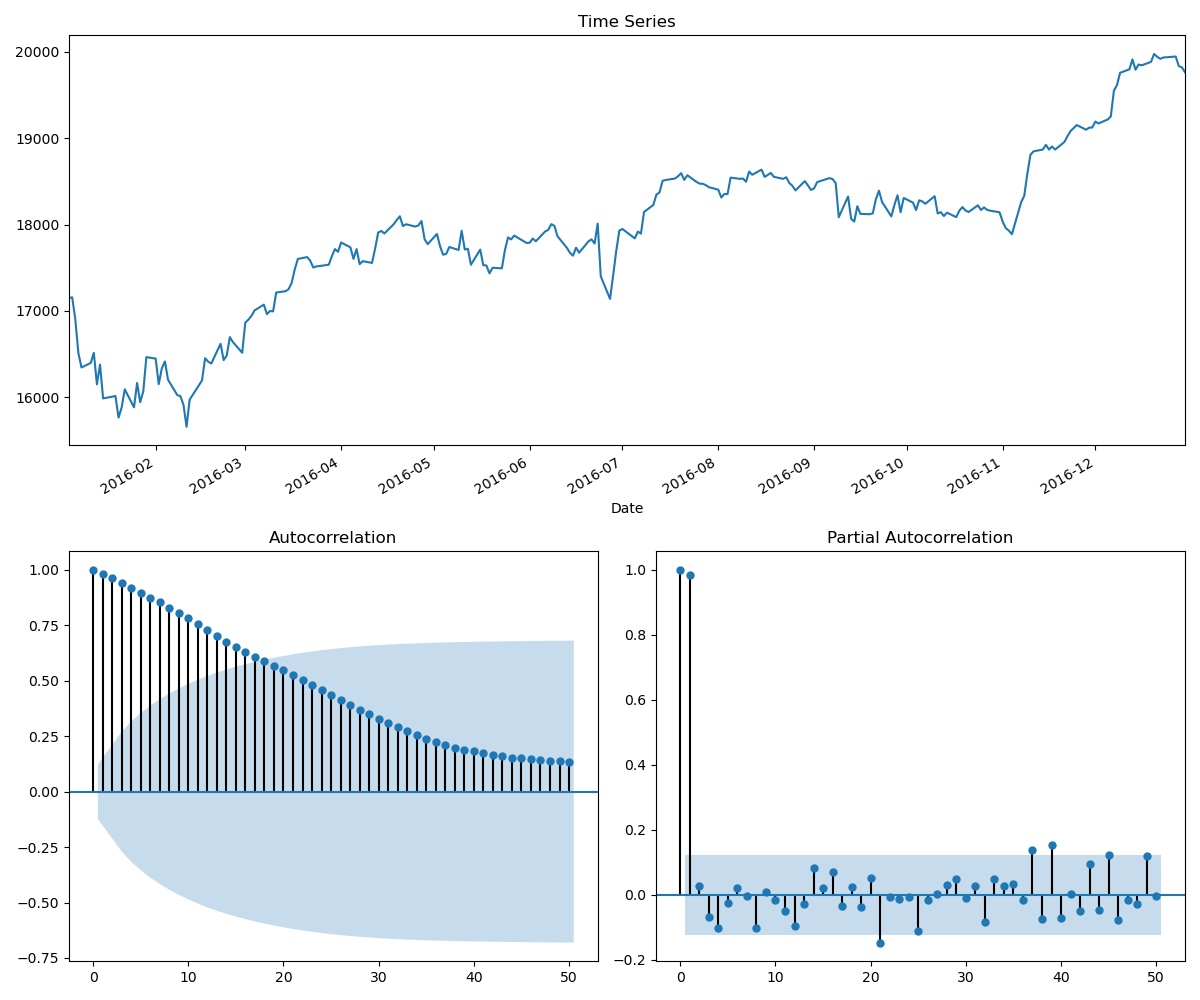

In [10]:
# Plot ACF and PACF
djia_df=djia_df.dropna()
plotds(djia_df['Close'], nlag=50)
plt.show()

The dataset clearly shows a non-stationary signal with an increasing trend. The ACF is also showing an exponential decay while PACF has a strong correlation in lag 2. 

The nonstationarity can also be checked by evaluating mean and variance in different time periods.
The difference in mean and variance validates the hypothesis of non-stationarity

In [11]:
# Evaluate mean and variance at mid values
mean1, mean2 =djia_df.iloc[:125].Close.mean(), djia_df.iloc[125:].Close.mean()
var1, var2 = djia_df.iloc[:125].Close.var(), djia_df.iloc[125:].Close.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=17226.579164, mean2=18616.603593
variance1=487045.734003, variance2=325183.639530


The evaluated mean and variance for both semesters show significant difference in mean and variance values, thus suggesting that the data is non-stationary. 

The ADF is a unit root test that evaluates the strength of trend in a time series component. The ADF uses higher-order AR models with an objective to optimize information criterion.

In the presence of strong auto correlation, the original series needs differencing. The NULL hypothesis of the ADF proposes that H0 : ρ =0 against the alternative hypothesis H0 : ρ <0. In other words, the null hypothesis is the presence of the unit root or non-stationarity whereas the alternate hypothesis suggests stationarity of the data.

In [12]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
adf_result= adfuller(djia_df.Close.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -0.462320
p-value: 0.899162


a more negative value of ADF statistics will represent a stationary signal. For the given dataset, as p-value is quite high, we cannot reject the NULL hypothesis making it a non-stationary signal

<IPython.core.display.Javascript object>


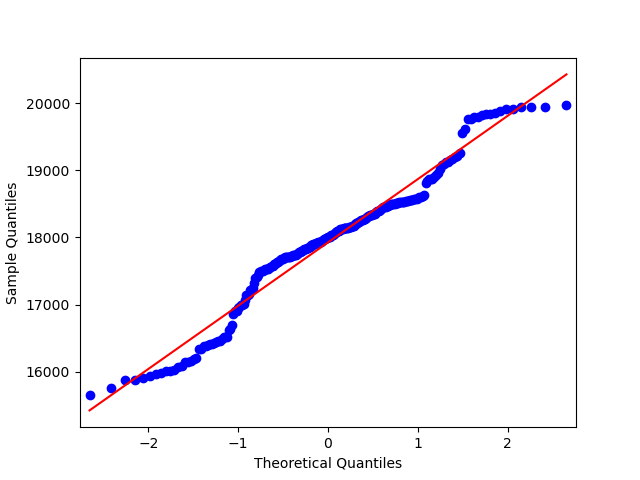

In [16]:
# QQ plot and probability plot
sm.qqplot(djia_df['Close'], line='s')
plt.show()

significant non-normality within the DJIA dataset

Differencing will help make the signal stationary

<IPython.core.display.Javascript object>


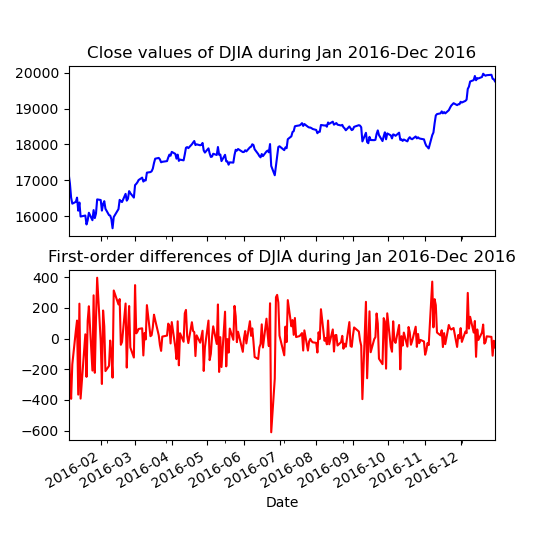

In [19]:
#Let us plot the original time series and first-differences
first_order_diff = djia_df['Close'].diff(1).dropna()
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')
plt.show()

<IPython.core.display.Javascript object>


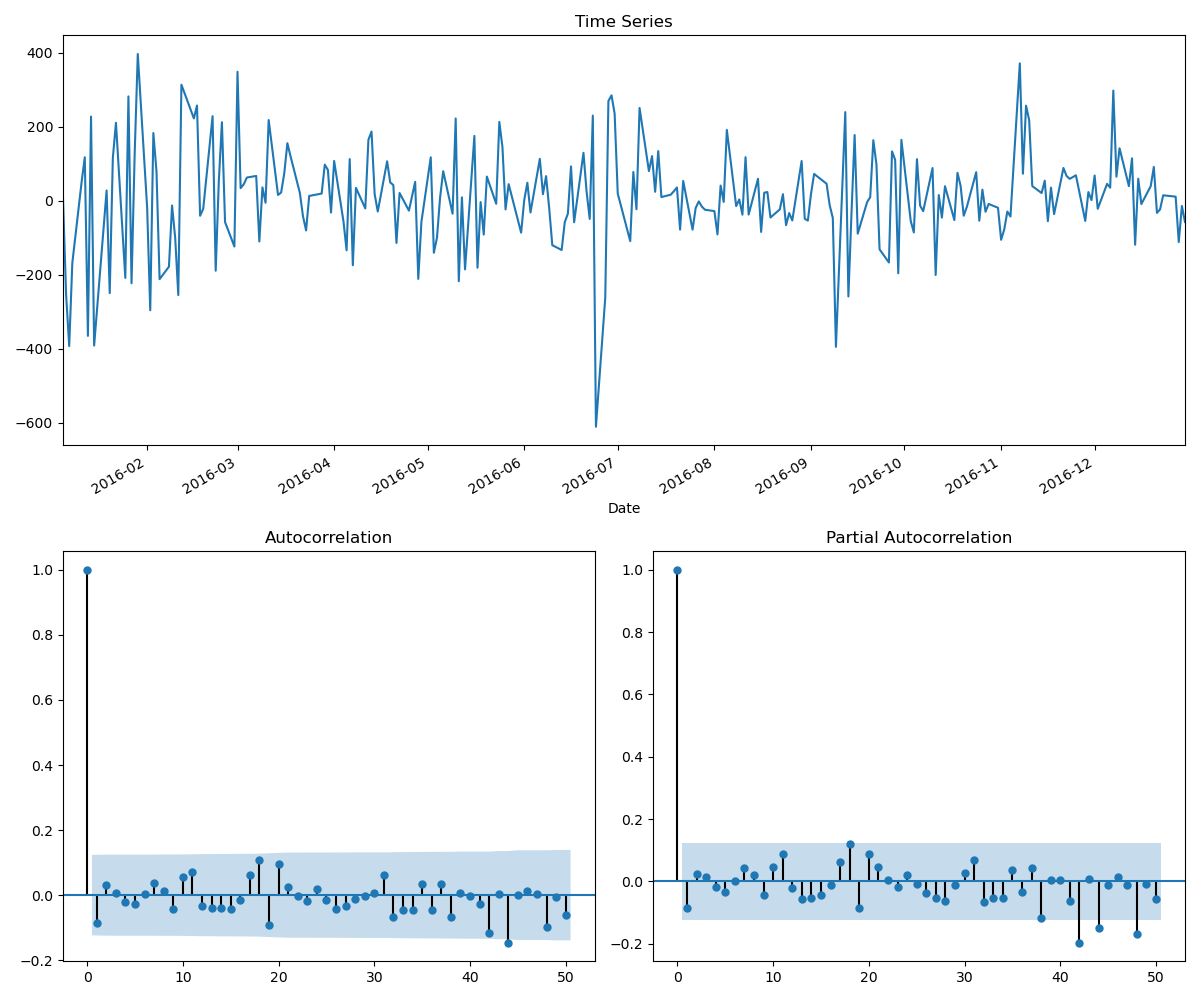

ADF Statistic: -17.135094
p-value: 0.000000


In [20]:
# plot signal
plotds(first_order_diff, nlag=50)
adf_result= adfuller(first_order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
plt.show()

The ADF statistics on residual have a value of -17.13 with p-val close to zero, thus stating that the model is stationary; however, both ACF and PACF show not much of trend of the moving average component showing a random walk behavior

DJIA difference ACF and PACF plots shown in Figure 4.30, the autocorrelation becomes slightly significant at 42 index, which means that there may be seasonality present.

In [28]:
# Optimize ARMA parameters
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(djia_df['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
pd.DataFrame(aicVal).sort_values(3,ascending=True)

,0,1,2,3
9,0,2,1,3177.769461
11,1,2,1,3177.995292
14,2,2,1,3179.841307
12,1,2,2,3179.888787
15,2,2,2,3180.938305
0,0,1,0,3182.635727
3,1,1,0,3182.837153
1,0,1,1,3182.931550
2,0,1,2,3184.662279
5,2,1,0,3184.695359


Let's pick ARIMA(0,2,1) for model fitting and evaluation. The ARIMA(0,2,1) applies second-order differencing and first-order moving average component
to determine the relationship between observations. 

In [29]:
# Optimal ARIMA model
arima_obj = ARIMA(djia_df['Close'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  250
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1585.885
Method:                       css-mle   S.D. of innovations            136.122
Date:                Wed, 15 Apr 2020   AIC                           3177.769
Time:                        14:17:23   BIC                           3188.334
Sample:                             2   HQIC                          3182.021
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1011      0.119      0.853      0.395      -0.131       0.334
ma.L1.D2.y    -1.0000      0.012    -81.004      0.000      -1.024      -0.976
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [30]:
# Evaluate prediction
pred=np.append([0,0],arima_obj_fit.fittedvalues.tolist())
djia_df['ARIMA']=pred
diffval=np.append([0,0], arima_obj_fit.resid+arima_obj_fit.fittedvalues)
djia_df['diffval']=diffval

<IPython.core.display.Javascript object>


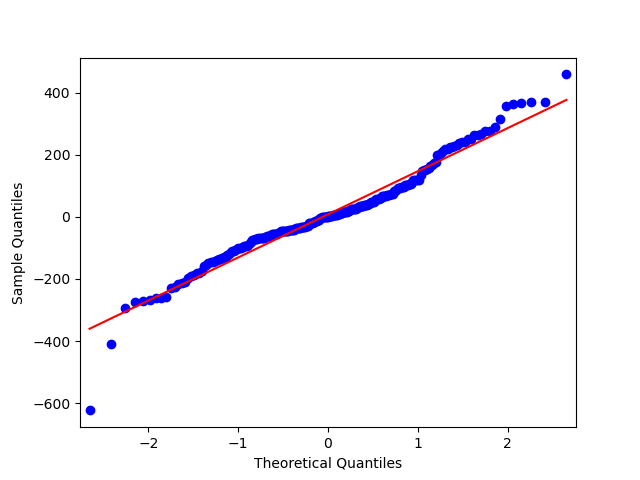

In [31]:
# QQ plot and probability plot
sm.qqplot(arima_obj_fit.resid, line='s')
plt.show()

# The comparison with the actual and forecasted values

<IPython.core.display.Javascript object>


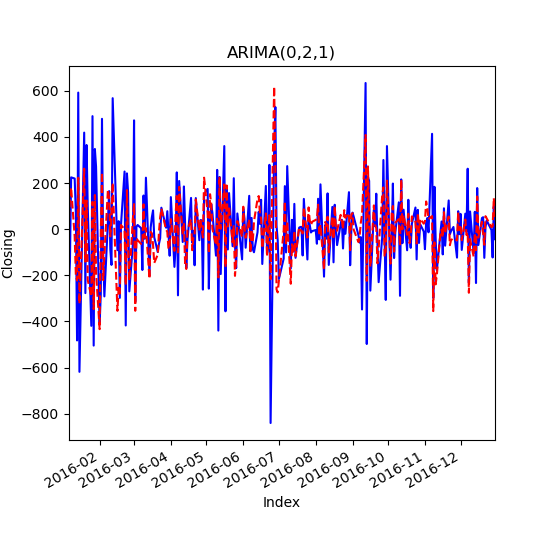

In [44]:
# Plot output
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
djia_df['diffval'].iloc[2:].plot(color='b', linestyle = '-', ax=axarr)
djia_df['ARIMA'].iloc[2:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(0,2,1)')
plt.xlabel('Index')
plt.ylabel('Closing')
plt.show()

The seasonal ARIMA is represented as ARIMA(p,d,q) (P, D,
Q)m, where P, D, and Q represent the seasonal part of auto-regressive, integrated, and moving average, respectively. The m in the seasonal ARIMA model represents the number of periods per season. In scenarios when seasonality is present, the extra steps of seasonal difference and seasonal adjustment may be required to ensure that the signal is stationary.

In [39]:
##############
# SARIMAX
##############
# Seasonality (based on first difference ACF shows significance at 42 lag)
x=djia_df['Close']-djia_df['Close'].shift(42)
mod = sm.tsa.statespace.SARIMAX(djia_df['Close'], trend='n', order=(0,2,1), seasonal_order=(1,1,1,42))
sarimax= mod.fit()
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(0, 2, 1)x(1, 1, 1, 42)   Log Likelihood               -1366.570
Date:                            Wed, 15 Apr 2020   AIC                           2741.141
Time:                                    14:41:01   BIC                           2754.491
Sample:                                         0   HQIC                          2746.539
                                            - 252                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     16.164     -0.062      0.951     -32.680      30.680
ar.S.L42      -0.2542      0.093     -2.727      0.006      -0.437      -0.072
ma.S.L42      -0.4671      0.130     -3.597      0.000      -0.722      -0.213
sigma2      2.355e+04    3.8e+05      0.062      0.951   -7.22e+05    7.69e+05
===================================================================================
Ljung-Box (Q):                       31.80   Jarque-Bera (JB):                21.28
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

at DJIA difference ACF and PACF plots shown in Figure 4.30, the
autocorrelation becomes slightly significant at 42 index, which means that there may be seasonality present. 

<IPython.core.display.Javascript object>


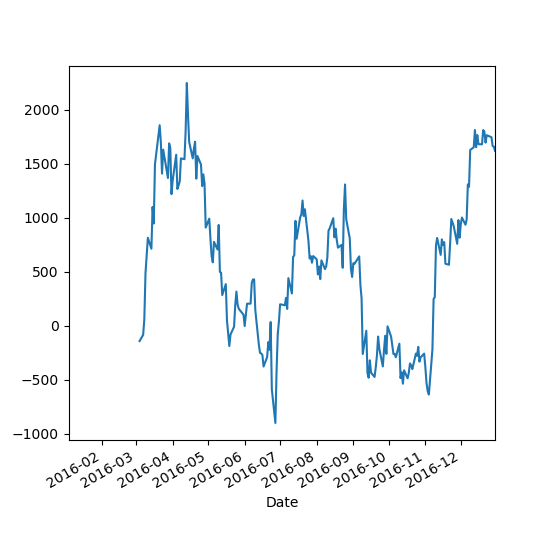

In [49]:
# Plot output
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
x.plot()
plt.show()

# Confidence interval

The confidence level in a forecasting model is defined by the alpha parameter in the forecast function. The alpha value 0.05 represents an estimate with 95% confidence, which can be interpreted as the estimates returned by the model have 5% probability of not falling in the defined distribution range

<IPython.core.display.Javascript object>


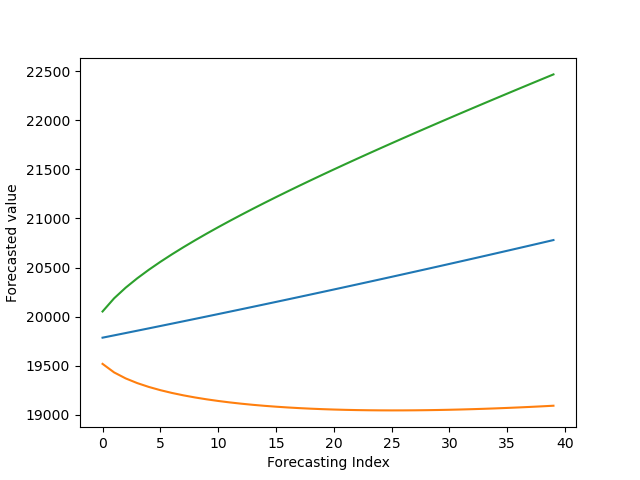

In [50]:
# Forecasting and CI
f, axarr = plt.subplots(1, sharex=True)
ff, err, ci=arima_obj_fit.forecast(40)
plt.plot(ff)
plt.plot(ci)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value')
plt.show()